In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (20,15)

In [2]:
columns = ["Name","Delivery","Address","Food_type","Rating","Reviews","Menu","Menu_Prices"]

In [9]:
df =pd.read_csv("./ubereats.csv", encoding="UTF-8", index_col=0, names=columns)

In [11]:
df = df.reset_index()
df

,Name,Delivery,Address,Food_type,Rating,Reviews,Menu,Menu_Prices
0,譚仔雲南米線 Tamjai Yunnan Mixian (利都樓),HKD 19 fee,"177-191a King'S Road, Fortress Hill, North Poi...",$ • Cantonese\n • \nChinese\n • \nFast Food,30–40 Min,4.6,"['(豬肚) 蜀香肚絲', '米線+一餸', '(過) 過橋米線套餐', '(小土) 湖南土...","['HK$20.00', 'HK$43.00', 'HK$70.00', 'HK$31.00..."
1,元祖三上大喜屋 (Tin Hau),HKD 14 fee,"17 Tsing Fung Street, G/F, Causeway Bay, Hong ...",$$ • Japanese\n • \nAllergy friendly\n • \nFam...,15–25 Min,4.3,"['和風牛肉丼汁飯 Gyu Don', '吉列豬扒咖喱飯 Curry Rice with C...","['HK$66.00', 'HK$58.00', 'HK$38.00', 'HK$38.00..."
2,傷心酸辣粉 Sour and Spicy Noodle (North Point),HKD 19 fee,"233 Electric Rd, North Point, Hong Kong, Shop ...",$ • Chinese,30–40 Min,4.2,"['單人套餐 Set for One', '傷心酸辣粉 Hot and Sour Noodl...","['HK$72.00', 'HK$35.00', 'HK$32.00', 'HK$188.0..."
3,McDonald's 麥當勞 (Tung Lo Wan Road),HKD 24 fee,"11 Tung Lo Wan Rd, Hong Kong, 1A,\n • \nMore info",$ • Fast Food,15–25 Min,4.3,"['', '', '', '', '', '', '', '', '', '', '', '...","['', '', '', '', '', '', '', '', '', '', '', '..."
4,火五越式牛肉粉專門店 Pho 5 (Tin Hau),HKD 14 fee,"17 Tsing Fung Street, G/F, Causeway Bay, Hong ...",$$ • Vietnamese\n • \nAllergy friendly\n • \nF...,20–30 Min,4.3,"['凍青檸梳打 Iced Lime Soda', '黃金脆魚皮 Crunchy Fish S...","['HK$68.00', 'HK$68.00', 'HK$35.00', 'HK$38.00..."
...,...,...,...,...,...,...,...,...
487,Alto,NaN,"31/F, V Point, 18 Tang Lung St, Causeway Bay, ...",$$ • Western,NaN,NaN,"['Whole Black Pepper Baby Chicken 黑椒童子鸡', 'Hot...","['HK$238.00', 'HK$248.00', 'HK$358.00', 'HK$32..."
488,鮨金 Sushi Kin,NaN,"Cubus, 1 Hoi Ping Rd, Causeway Bay, 12/F,,\n •...",$$ • Japanese,NaN,NaN,"['海鹽活鰻魚飯 Grilled Eel Rice with Sea Salt', '銀鱈魚...","['HK$200.00', 'HK$260.00', 'HK$200.00', 'HK$42..."
489,素之樂創意蔬食料理,NaN,"60a Java Rd, Suite 108, 1/F, Foo Yet Kai Build...",$$ • Healthy\n • \nChinese\n • \nAsian,NaN,NaN,"['蜜汁素叉燒飯 Vegetarian Char Siu Rice', '南國咖喱鮮蔬飯 V...","['HK$120.00', 'HK$120.00']"
490,金鶴拉麵 Kane Tsuru Ramen (蜆殼街),HKD 19 fee,"16 Shell St, Shop E, G/F, , Eastern District, ...",$ • Japanese,25–35 Min,NaN,['上善如水 (白色) 純米吟釀 (300 毫升) Jozen Mizuno Gotoshi...,"['HK$118.00', 'HK$106.00', 'HK$106.00', 'HK$23..."


<AxesSubplot:>

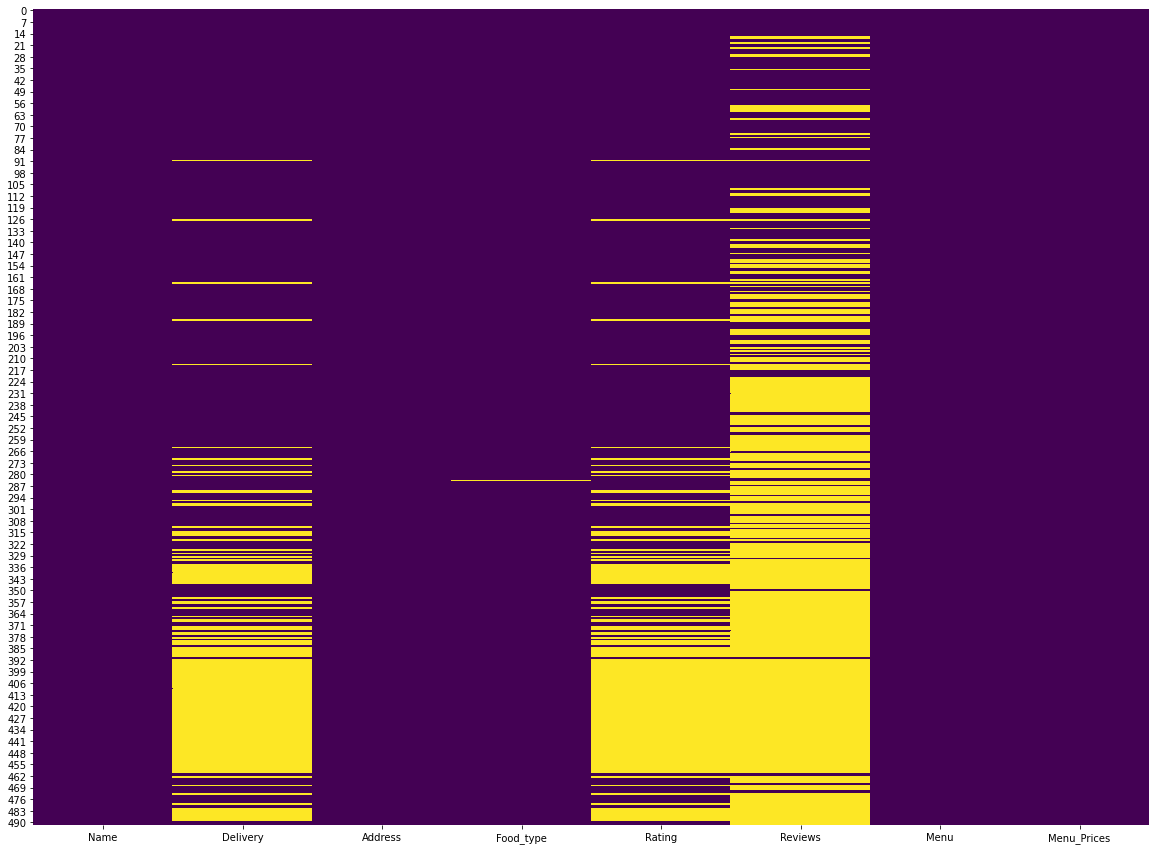

In [13]:
sns.heatmap(df.isnull(), cmap="viridis",cbar=False)

In [14]:
import re

In [15]:
df.Name = df.Name.apply(lambda x: x.lower() if isinstance(x,str) else x)

In [18]:

def getEng(context):
    context = context# convert context from str to unicode
    filtrate = re.compile(u'[\u4E00-\u9FA5]') # non-Chinese unicode range
    context = filtrate.sub(r'', context) # remove all non-Chinese characters
    # context = context.encode("utf-8") # convert unicode back to str
    return context

getEng("194號健康邨第一期地下舖Test Sample")


'194Test Sample'

In [21]:
df["Merge"] = df.Name.apply(lambda x: getEng(x) if (isinstance(x,str) and len(x.split())>4 )else x)b

In [20]:
# df["Merge"] = df.Name.apply(lambda x: re.search("(.+)\(?.+\)?",x).group(1) if isinstance(x,str) else x)

In [75]:
df.Merge = df.Merge.apply(lambda x: re.sub("\(.*","", x).strip() if isinstance(x,str) else x)

In [76]:
df.Reviews = df.Reviews.apply(lambda x: re.sub("\(","",x) if isinstance(x,str) else x)
df.Reviews = df.Reviews.apply(lambda x: re.sub("\)","",x) if isinstance(x,str) else x)
df.Reviews = df.Reviews.apply(lambda x: re.sub("\+","",x).strip() if isinstance(x,str) else x)

In [77]:
df.Menu_Prices[1].split(",")[-1]

" 'HK$1.50']"

In [78]:
def cleanprices(x):
    x = x.split(",")
    new_list = []
    for price in x:
        if isinstance(price,str):
            try:
                price = re.search("HK\$(.+\d)", price).group(1)
                price = float(price)
                new_list.append(price)
            except:
                pass
        else:
            pass
    total = len(new_list)    
    if total != 0:
        return int(round(sum(new_list)/total,0))
    else:
        return np.nan

In [79]:
df["Average_price"] = df.Menu_Prices.apply(cleanprices)

In [80]:
df.Delivery = df.Delivery.apply(lambda x: re.sub("HKD ", "",x) if isinstance(x,str) else x)
df.Delivery = df.Delivery.apply(lambda x: re.sub(" fee", "",x) if isinstance(x,str) else x)

In [81]:
df.Delivery.value_counts()

19     142
24      73
14      49
9       15
4        8
4.3      8
4.4      7
4.7      7
4.6      7
4.5      5
4.2      3
4.1      3
3.8      3
29       2
4.8      1
4.9      1
Name: Delivery, dtype: int64

In [82]:
df.head()

,Name,Delivery,Address,Food_type,Rating,Reviews,Menu,Menu_Prices,Merge,Average_price
0,譚仔雲南米線 tamjai yunnan mixian (利都樓),19,"177-191a King'S Road, Fortress Hill, North Poi...",$ • Cantonese\n • \nChinese\n • \nFast Food,4.5,100,"['(過) 過橋米線套餐', '米線+一餸', '(大土) 湖南土匪雞翼-5隻', '(小土...","['HK$70.00', 'HK$43.00', 'HK$41.00', 'HK$31.00...",tamjai yunnan mixian,32.0
1,mcdonald's 麥當勞 (tung lo wan road),24,"11 Tung Lo Wan Rd, Hong Kong, 1A,\n • \nMore info",$ • Fast Food,4.3,52,"['', '', '', '', '', '', '', '', '', '', '', '...","['', '', '', '', '', '', '', '', '', '', '', '...",mcdonald's,40.0
2,元祖三上大喜屋 (tin hau),14,"17 Tsing Fung Street, G/F, Causeway Bay, Hong ...",$$ • Japanese\n • \nAllergy friendly\n • \nFam...,4.3,100,"['吉列豬扒咖喱飯 Curry Rice with Cutlet Pork Chop', '...","['HK$66.00', 'HK$66.00', 'HK$38.00', 'HK$32.00...",元祖三上大喜屋,47.0
3,傷心酸辣粉 sour and spicy noodle (north point),19,"233 Electric Rd, North Point, Hong Kong, Shop ...",$ • Chinese,4.2,100,"['單人套餐 Set for One', '傷心酸辣粉 Hot and Sour Noodl...","['HK$72.00', 'HK$35.00', 'HK$188.00', 'HK$32.0...",sour and spicy noodle,77.0
4,南記粉麵 nam kee spring roll noodle co. ltd (cause...,24,"96 Percival St, Causeway Bay, Hong Kong, Shop ...",$ • Cantonese,4.5,100,"['酸辣米線 Sour and Spicy Noodles', '招牌辣豬肉米線 Signa...","['HK$46.00', 'HK$46.00', 'HK$58.00', 'HK$50.00...",nam kee spring roll noodle co. ltd,71.0


In [83]:
df[df.isna().any(axis=1)]
df[df.isna().any(axis=1)]

,Name,Delivery,Address,Food_type,Rating,Reviews,Menu,Menu_Prices,Merge,Average_price
29,NaN,NaN,NaN,NaN,NaN,NaN,[],[],NaN,NaN
38,doner kebab,14,"Fu Lee Loy Shopping Centre, 9-27 King Wah Road...",$$ • Middle Eastern,NaN,NaN,"['Chicken Doner Kebab Rice 轉轉燒雞肉飯', 'Samosa 咖喱...","['HK$38.00', 'HK$48.00', 'HK$123.00', 'HK$23.0...",doner kebab,69.0
48,豪仔記麵食ho chai kee noodle,24,"497 King'S Rd, Shop G, G/F., Tung Po Building,...",$ • Chinese\n • \nCantonese\n • \nAsian,NaN,NaN,"['雲吞 (6 粒) Wontons (6 pcs)', '鯪魚肉 (半磅) Dace Me...","['HK$43.00', 'HK$43.00', 'HK$43.00', 'HK$34.00...",豪仔記麵食ho chai kee noodle,40.0
50,泰北風味 chiang mai style thai restaurant,9,"Shop B,, 20 Shelter Street, Causeway Bay, Hong...",$ • Thai,NaN,NaN,['泰北香草炒青口 Stir-fried Mussels with Basil in Tha...,"['HK$94.00', 'HK$226.00', 'HK$178.00', 'HK$250...",chiang mai style thai restaurant,128.0
58,蛋香烘焙,19,"254-280 Electric Road, North Point, Hong Kong,...",$$$ • Cantonese,NaN,NaN,['紫菜加肉鬆雞蛋仔 Eggette with Seaweed and Pork Floss...,"['HK$44.00', 'HK$42.00', 'HK$28.00', 'HK$36.00...",蛋香烘焙,30.0
...,...,...,...,...,...,...,...,...,...,...
551,留家廚房 kin's kitchen,NaN,"314-324 Hennessy Rd, 5/F, Hong Kong Island\n •...",$$ • Cantonese\n • \nChinese,NaN,NaN,"[""留家煙燻雞 Kin's Smoked Chicken"", '留家明蝦 Sautéed K...","['HK$210.00', 'HK$76.00', 'HK$210.00', 'HK$52....",留家廚房 kin's kitchen,126.0
552,皇潮軒,NaN,"Bay View Mansion, 24-36 Causeway Rd, Causeway ...",$$ • Cantonese,NaN,NaN,['南非五頭乾鮑伴花菇 (位) South African Five Heads Abalo...,"['HK$118.00', 'HK$118.00', 'HK$118.00', 'HK$20...",皇潮軒,209.0
553,職人食事 craftsman dinner (銅鑼灣 causeway bay),NaN,"3 Sugar St, Shop 2027 ,2/F , Causeway Square ,...",$ • Japanese\n • \nAsian Fusion\n • \nAsian,NaN,NaN,"['三文魚玉子蟹籽飯 Rice with Salmon, Japanese Egg Roll...","['HK$72.00', 'HK$72.00', 'HK$72.00', 'HK$84.00...",craftsman dinner,119.0
554,my home cafe,NaN,"510 Lockhart Rd, Causeway Bay, Hong Kong, 3/F,...",$$ • Cafe,NaN,NaN,"['薄荷朱古力 Mint Chocolate', '榛子朱古力 Hazelnut Choco...","['HK$98.00', 'HK$108.00', 'HK$108.00', 'HK$118...",my home cafe,123.0


In [84]:
df.Rating.value_counts()

4.6       30
4.5       23
4.4       22
4.8       19
4.3       18
4.7       16
4.2       12
4.1        8
4          6
(14)       5
(12)       5
4.9        5
(10)       4
(11)       4
3.9        3
(18)       3
(30)       2
(13)       2
3.8        2
(37)       2
(100+)     2
(21)       2
5          2
(26)       1
(40)       1
(80)       1
(55)       1
(41)       1
(44)       1
(49)       1
2.4        1
(17)       1
(74)       1
(15)       1
(22)       1
3.6        1
(93)       1
(20)       1
(70)       1
Name: Rating, dtype: int64

In [85]:
def extract1(x):
    if isinstance(x,str):
        if "(" in x:
            return x
    else:
        pass

def extract2(x):
    if isinstance(x,str):
        if float(x) < 9:
            return x
    else:
        pass

In [86]:
df['ReviewsCopy'] = df.Rating.apply(extract1)

In [87]:
df.Delivery.value_counts()

19     142
24      73
14      49
9       15
4        8
4.3      8
4.4      7
4.7      7
4.6      7
4.5      5
4.2      3
4.1      3
3.8      3
29       2
4.8      1
4.9      1
Name: Delivery, dtype: int64

In [88]:
df.ReviewsCopy = df.ReviewsCopy.fillna(df["Reviews"])

In [89]:
df['RatingCopy'] = df.Delivery.apply(extract2)

In [90]:
df.RatingCopy = df.RatingCopy.fillna(df["Rating"])

In [91]:
df.Delivery = df.Delivery.apply(lambda x: x if float(x)>9 else np.nan)

In [92]:
df.columns

Index(['Name', 'Delivery', 'Address', 'Food_type', 'Rating', 'Reviews', 'Menu',
       'Menu_Prices', 'Merge', 'Average_price', 'ReviewsCopy', 'RatingCopy'],
      dtype='object')

In [93]:
df =df[["Merge","Name","Delivery","Address","Food_type","RatingCopy","ReviewsCopy","Menu","Average_price"]]

In [94]:
df.to_csv("cleanedUber.csv")

In [95]:
df

,Merge,Name,Delivery,Address,Food_type,RatingCopy,ReviewsCopy,Menu,Average_price
0,tamjai yunnan mixian,譚仔雲南米線 tamjai yunnan mixian (利都樓),19,"177-191a King'S Road, Fortress Hill, North Poi...",$ • Cantonese\n • \nChinese\n • \nFast Food,4.5,100,"['(過) 過橋米線套餐', '米線+一餸', '(大土) 湖南土匪雞翼-5隻', '(小土...",32.0
1,mcdonald's,mcdonald's 麥當勞 (tung lo wan road),24,"11 Tung Lo Wan Rd, Hong Kong, 1A,\n • \nMore info",$ • Fast Food,4.3,52,"['', '', '', '', '', '', '', '', '', '', '', '...",40.0
2,元祖三上大喜屋,元祖三上大喜屋 (tin hau),14,"17 Tsing Fung Street, G/F, Causeway Bay, Hong ...",$$ • Japanese\n • \nAllergy friendly\n • \nFam...,4.3,100,"['吉列豬扒咖喱飯 Curry Rice with Cutlet Pork Chop', '...",47.0
3,sour and spicy noodle,傷心酸辣粉 sour and spicy noodle (north point),19,"233 Electric Rd, North Point, Hong Kong, Shop ...",$ • Chinese,4.2,100,"['單人套餐 Set for One', '傷心酸辣粉 Hot and Sour Noodl...",77.0
4,nam kee spring roll noodle co. ltd,南記粉麵 nam kee spring roll noodle co. ltd (cause...,24,"96 Percival St, Causeway Bay, Hong Kong, Shop ...",$ • Cantonese,4.5,100,"['酸辣米線 Sour and Spicy Noodles', '招牌辣豬肉米線 Signa...",71.0
...,...,...,...,...,...,...,...,...,...
551,留家廚房 kin's kitchen,留家廚房 kin's kitchen,NaN,"314-324 Hennessy Rd, 5/F, Hong Kong Island\n •...",$$ • Cantonese\n • \nChinese,NaN,NaN,"[""留家煙燻雞 Kin's Smoked Chicken"", '留家明蝦 Sautéed K...",126.0
552,皇潮軒,皇潮軒,NaN,"Bay View Mansion, 24-36 Causeway Rd, Causeway ...",$$ • Cantonese,NaN,NaN,['南非五頭乾鮑伴花菇 (位) South African Five Heads Abalo...,209.0
553,craftsman dinner,職人食事 craftsman dinner (銅鑼灣 causeway bay),NaN,"3 Sugar St, Shop 2027 ,2/F , Causeway Square ,...",$ • Japanese\n • \nAsian Fusion\n • \nAsian,NaN,NaN,"['三文魚玉子蟹籽飯 Rice with Salmon, Japanese Egg Roll...",119.0
554,my home cafe,my home cafe,NaN,"510 Lockhart Rd, Causeway Bay, Hong Kong, 3/F,...",$$ • Cafe,NaN,NaN,"['薄荷朱古力 Mint Chocolate', '榛子朱古力 Hazelnut Choco...",123.0


In [96]:
df["Dollar_signs"] = df.Food_type.apply(lambda x: int(x.count("$")) if isinstance(x,str) else x)

In [97]:
df

,Merge,Name,Delivery,Address,Food_type,RatingCopy,ReviewsCopy,Menu,Average_price,Dollar_signs
0,tamjai yunnan mixian,譚仔雲南米線 tamjai yunnan mixian (利都樓),19,"177-191a King'S Road, Fortress Hill, North Poi...",$ • Cantonese\n • \nChinese\n • \nFast Food,4.5,100,"['(過) 過橋米線套餐', '米線+一餸', '(大土) 湖南土匪雞翼-5隻', '(小土...",32.0,1.0
1,mcdonald's,mcdonald's 麥當勞 (tung lo wan road),24,"11 Tung Lo Wan Rd, Hong Kong, 1A,\n • \nMore info",$ • Fast Food,4.3,52,"['', '', '', '', '', '', '', '', '', '', '', '...",40.0,1.0
2,元祖三上大喜屋,元祖三上大喜屋 (tin hau),14,"17 Tsing Fung Street, G/F, Causeway Bay, Hong ...",$$ • Japanese\n • \nAllergy friendly\n • \nFam...,4.3,100,"['吉列豬扒咖喱飯 Curry Rice with Cutlet Pork Chop', '...",47.0,2.0
3,sour and spicy noodle,傷心酸辣粉 sour and spicy noodle (north point),19,"233 Electric Rd, North Point, Hong Kong, Shop ...",$ • Chinese,4.2,100,"['單人套餐 Set for One', '傷心酸辣粉 Hot and Sour Noodl...",77.0,1.0
4,nam kee spring roll noodle co. ltd,南記粉麵 nam kee spring roll noodle co. ltd (cause...,24,"96 Percival St, Causeway Bay, Hong Kong, Shop ...",$ • Cantonese,4.5,100,"['酸辣米線 Sour and Spicy Noodles', '招牌辣豬肉米線 Signa...",71.0,1.0
...,...,...,...,...,...,...,...,...,...,...
551,留家廚房 kin's kitchen,留家廚房 kin's kitchen,NaN,"314-324 Hennessy Rd, 5/F, Hong Kong Island\n •...",$$ • Cantonese\n • \nChinese,NaN,NaN,"[""留家煙燻雞 Kin's Smoked Chicken"", '留家明蝦 Sautéed K...",126.0,2.0
552,皇潮軒,皇潮軒,NaN,"Bay View Mansion, 24-36 Causeway Rd, Causeway ...",$$ • Cantonese,NaN,NaN,['南非五頭乾鮑伴花菇 (位) South African Five Heads Abalo...,209.0,2.0
553,craftsman dinner,職人食事 craftsman dinner (銅鑼灣 causeway bay),NaN,"3 Sugar St, Shop 2027 ,2/F , Causeway Square ,...",$ • Japanese\n • \nAsian Fusion\n • \nAsian,NaN,NaN,"['三文魚玉子蟹籽飯 Rice with Salmon, Japanese Egg Roll...",119.0,1.0
554,my home cafe,my home cafe,NaN,"510 Lockhart Rd, Causeway Bay, Hong Kong, 3/F,...",$$ • Cafe,NaN,NaN,"['薄荷朱古力 Mint Chocolate', '榛子朱古力 Hazelnut Choco...",123.0,2.0


<AxesSubplot:xlabel='Dollar_signs', ylabel='Average_price'>

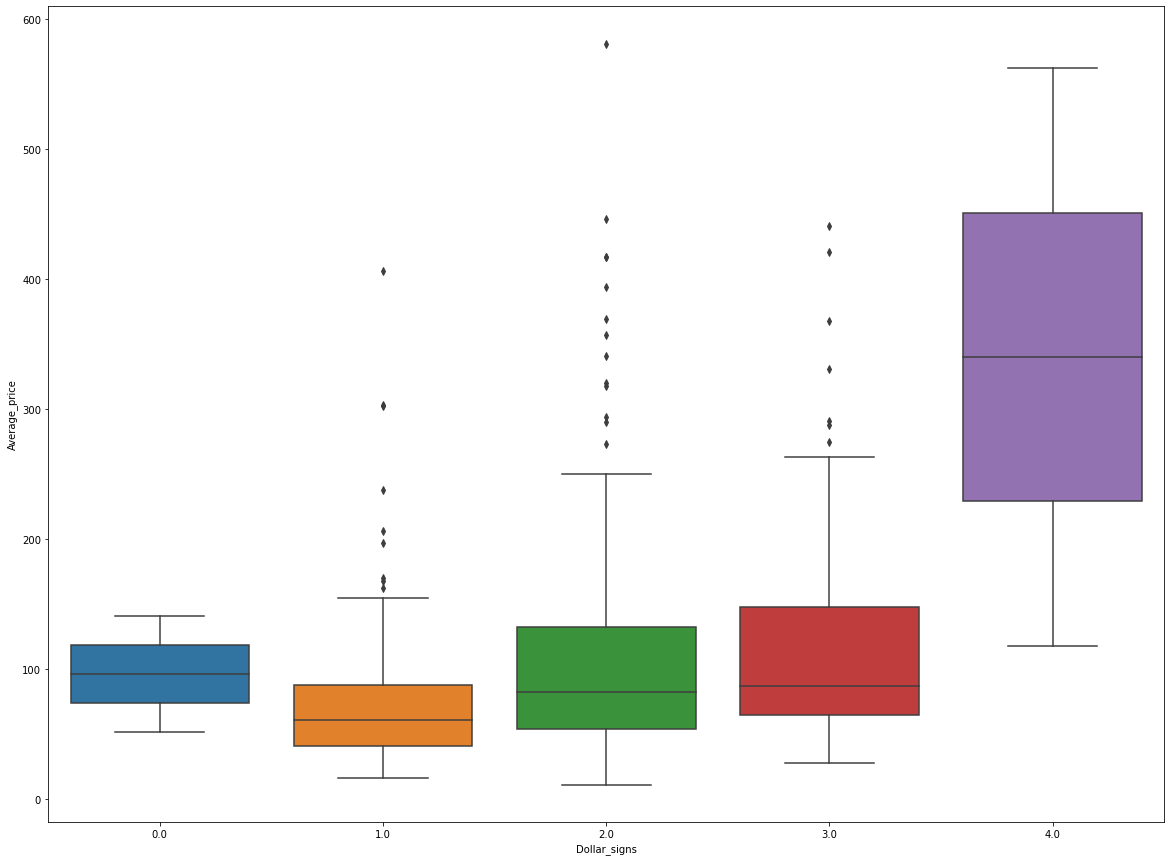

In [98]:
sns.boxplot(data = df, x="Dollar_signs", y="Average_price")

In [99]:
df[df["Average_price"] > 300]

,Merge,Name,Delivery,Address,Food_type,RatingCopy,ReviewsCopy,Menu,Average_price,Dollar_signs
102,の japanese sake shop & bar,酒の和 japanese sake shop & bar,NaN,"3 Yiu Wa St, Room 1601, 16/F, Hong Kong Island...",$$ • Alcohol,NaN,NaN,['若波 10th Anniversary Vintage 2017 Wakanami 10...,394.0,2.0
182,benson crab & wine shop,benson crab & wine shop,NaN,"2 Min Fat St, Happy Valley, Hong Kong, G/F, Sh...",$$$ • French,4,NaN,"['Courvoisier VSOP 拿破崙 40% #207028-70', 'Marte...",441.0,3.0
191,y pasta 手作意粉屋,y pasta 手作意粉屋,14,"459 Lockhart Road, 14/F, Hong Kong Island\n • ...",$$ • Western,4.8,10,['香草焗雞翼 (6隻）Baked Italian Herbs Chicken Wings ...,581.0,2.0
218,chillers,chillers (north point),14,"183 Electric Road, North Point, G/F,, Hong Kon...",$ • Alcohol\n • \nDrinks\n • \nWine,NaN,NaN,"['Gunn Estate Sauvignon Blanc', 'Aguaribay Mal...",302.0,1.0
244,chillers,chillers (happy valley),19,"31 Wong Nai Chung Rd, Happy Valley, Hong Kong,...",$ • Alcohol\n • \nWine\n • \nDrinks,NaN,NaN,"['Smirnoff', 'Modelo Negra', 'Dragons Back', '...",303.0,1.0
269,casa pennington,casa pennington,NaN,"13-15 Pennington Street, Causeway Bay, H.K., C...",$$$ • Western,4,NaN,['Australian M5 Wagyu Sirloin Steak 澳洲 M5 和牛西冷...,368.0,3.0
281,玩具屋 ganguya,玩具屋 ganguya,19,"16 號 Ngan Mok St, Causeway Bay, Hong Kong, Sho...",$$$ • Japanese,NaN,NaN,"['汁燒牛腹身配白飯及麵豉湯', '鹽燒五花腩配白飯及麵豉湯', '汁燒雞扒配白飯及麵豉湯'...",421.0,3.0
298,avize champagne cellar,avize champagne cellar,NaN,"17 Moreton Terrace, Causeway Bay, Hong Kong, G...",$$$$ • Alcohol,NaN,NaN,"['Dom Perignon 2008', 'Louis Roederer Brut Pre...",562.0,4.0
337,牛一 nabe one,牛一 nabe one (銅鑼灣),NaN,"17/F, 99 Percival St, Bowrington, Hong Kong, S...",$ • Japanese,NaN,NaN,['日本胡麻醬 (120 毫升) Japanese Sesame Sauce (120 ml...,406.0,1.0
340,the hua club 紅花會,the hua club 紅花會,NaN,"303 Jaffe Rd, 2/F, KONNECT, , Wan Chai, Hong K...",$$ • Chinese,NaN,NaN,['2205. 老壇酸菜桂魚 Poached Mandarin Fish with Pick...,318.0,2.0


In [100]:
df

,Merge,Name,Delivery,Address,Food_type,RatingCopy,ReviewsCopy,Menu,Average_price,Dollar_signs
0,tamjai yunnan mixian,譚仔雲南米線 tamjai yunnan mixian (利都樓),19,"177-191a King'S Road, Fortress Hill, North Poi...",$ • Cantonese\n • \nChinese\n • \nFast Food,4.5,100,"['(過) 過橋米線套餐', '米線+一餸', '(大土) 湖南土匪雞翼-5隻', '(小土...",32.0,1.0
1,mcdonald's,mcdonald's 麥當勞 (tung lo wan road),24,"11 Tung Lo Wan Rd, Hong Kong, 1A,\n • \nMore info",$ • Fast Food,4.3,52,"['', '', '', '', '', '', '', '', '', '', '', '...",40.0,1.0
2,元祖三上大喜屋,元祖三上大喜屋 (tin hau),14,"17 Tsing Fung Street, G/F, Causeway Bay, Hong ...",$$ • Japanese\n • \nAllergy friendly\n • \nFam...,4.3,100,"['吉列豬扒咖喱飯 Curry Rice with Cutlet Pork Chop', '...",47.0,2.0
3,sour and spicy noodle,傷心酸辣粉 sour and spicy noodle (north point),19,"233 Electric Rd, North Point, Hong Kong, Shop ...",$ • Chinese,4.2,100,"['單人套餐 Set for One', '傷心酸辣粉 Hot and Sour Noodl...",77.0,1.0
4,nam kee spring roll noodle co. ltd,南記粉麵 nam kee spring roll noodle co. ltd (cause...,24,"96 Percival St, Causeway Bay, Hong Kong, Shop ...",$ • Cantonese,4.5,100,"['酸辣米線 Sour and Spicy Noodles', '招牌辣豬肉米線 Signa...",71.0,1.0
...,...,...,...,...,...,...,...,...,...,...
551,留家廚房 kin's kitchen,留家廚房 kin's kitchen,NaN,"314-324 Hennessy Rd, 5/F, Hong Kong Island\n •...",$$ • Cantonese\n • \nChinese,NaN,NaN,"[""留家煙燻雞 Kin's Smoked Chicken"", '留家明蝦 Sautéed K...",126.0,2.0
552,皇潮軒,皇潮軒,NaN,"Bay View Mansion, 24-36 Causeway Rd, Causeway ...",$$ • Cantonese,NaN,NaN,['南非五頭乾鮑伴花菇 (位) South African Five Heads Abalo...,209.0,2.0
553,craftsman dinner,職人食事 craftsman dinner (銅鑼灣 causeway bay),NaN,"3 Sugar St, Shop 2027 ,2/F , Causeway Square ,...",$ • Japanese\n • \nAsian Fusion\n • \nAsian,NaN,NaN,"['三文魚玉子蟹籽飯 Rice with Salmon, Japanese Egg Roll...",119.0,1.0
554,my home cafe,my home cafe,NaN,"510 Lockhart Rd, Causeway Bay, Hong Kong, 3/F,...",$$ • Cafe,NaN,NaN,"['薄荷朱古力 Mint Chocolate', '榛子朱古力 Hazelnut Choco...",123.0,2.0


In [101]:
df["Cuisine"] = df.Food_type.apply(lambda x: x.replace("\n","").replace("$","").replace("•","").strip().split("  ") if isinstance(x,str) else x)

In [106]:
df.iloc[29]

Merge            NaN
Name             NaN
Delivery         NaN
Address          NaN
Food_type        NaN
RatingCopy       NaN
ReviewsCopy      NaN
Menu              []
Average_price    NaN
Dollar_signs     NaN
Cuisine          NaN
Name: 29, dtype: object

In [109]:
df =df.drop(29)

Merge                    x  ki's roasted goose & gwing kee noodles
Name             棋哥燒鵝 x 炯記餐室 ki's roasted goose & gwing kee noo...
Delivery                                                        19
Address          499號 Jaffe Rd, Causeway Bay, Hong Kong, Shop G...
Food_type                                              $ • Chinese
RatingCopy                                                     4.3
ReviewsCopy                                                     81
Menu             ['老火靚湯 Double Stewed Soup', '郊外油菜 Poached Vege...
Average_price                                                   86
Dollar_signs                                                     1
Cuisine                                                  [Chinese]
Name: 30, dtype: object

In [111]:
df.to_csv("cleanedUber.csv")
